# Convert `.eit` Files to a Different File Type

### Most of the code was adapted from [EITLabworks/scioPy](https://github.com/EITLabworks/scioPy)

## `.eit` $\rightarrow$ `.npz`

This example script shows how the `.eit` files of the EIT device created with the standard software can be converted into `.npz` files. 

In [3]:
import os
from datetime import datetime
from glob import glob
from utils import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
################################################################
############# Convert .eit files to .npz files #################
base_path = "/Users/arash/Desktop/Uni_semester/Master_Thesis/Codes/Participant_test1/EIT_raw/20250113 09.24.18/setup"
tar_path = ""

convert_fulldir_doteit_to_npz(base_path, tar_path)

In [3]:
################################################################
############# Process eit files and adjusts electrode pairing #################

process_eit_files(tar_path=tar_path, skip=5, n_el=16)

In [4]:

tmp = np.load("eit_data/processed/setup_00001.npz", allow_pickle=True)
tmp.files

['eit', 'timestamp']

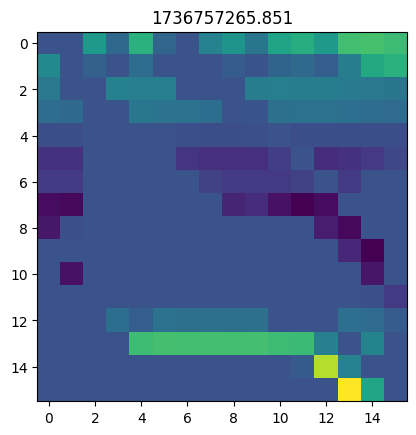

In [5]:
plt.title(tmp["timestamp"])
plt.imshow(tmp["eit"].real)
plt.show()